In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time

In [2]:
IPL=pd.read_csv("C:/Users/LENOVO/Downloads\project IPL\IPL_2015-2019.csv")

In [3]:
IPL

,Players,Innings,Notout,Runs,High_Score,Average,Balls_Faced,Strike_rate,100_s,50_s,4_s,6_s,Years,Outs,Overs
0,DavidWarner,14,1,562,91,43.23,359,156.54,0,7,65,21,2015,13,59
1,LendlSimmons,13,1,540,71,45.00,441,122.44,0,6,56,21,2015,12,73
2,AjinkyaRahane,13,2,540,91,49.09,413,130.75,0,4,53,13,2015,11,68
3,ABdeVilliers,14,3,513,133,46.63,293,175.08,1,2,60,22,2015,11,48
4,ViratKohli,16,5,505,82,45.90,386,130.82,0,3,35,23,2015,11,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CarlosBrathwaite,2,0,11,6,5.50,10,110.00,0,0,1,0,2019,2,1
496,IshantSharma,3,3,10,10,3.33,3,333.33,0,0,1,1,2019,0,0
497,ShakibAlHasan,1,0,9,9,9.00,10,90.00,0,0,0,0,2019,1,1
498,PawanNegi,4,0,9,5,2.25,12,75.00,0,0,1,0,2019,4,2


In [4]:
IPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Players      500 non-null    object 
 1   Innings      500 non-null    int64  
 2   Notout       500 non-null    int64  
 3   Runs         500 non-null    int64  
 4   High_Score   500 non-null    int64  
 5   Average      500 non-null    float64
 6   Balls_Faced  500 non-null    int64  
 7   Strike_rate  500 non-null    float64
 8   100_s        500 non-null    int64  
 9   50_s         500 non-null    int64  
 10  4_s          500 non-null    int64  
 11  6_s          500 non-null    int64  
 12  Years        500 non-null    int64  
 13  Outs         500 non-null    int64  
 14  Overs        500 non-null    int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 58.7+ KB


In [5]:
IPL_df=IPL.groupby('Players').sum()

In [6]:
IPL_df['Strike_rate']=(IPL_df['Runs']/IPL_df['Balls_Faced'])*100
IPL_df['Strike_rate']=round(IPL_df['Strike_rate'],2)

In [7]:
IPL_df.drop('Years',axis=1,inplace=True)

In [8]:
IPL_df

,Innings,Notout,Runs,High_Score,Average,Balls_Faced,Strike_rate,100_s,50_s,4_s,6_s,Outs,Overs
Players,,,,,,,,,,,,,
ABdeVilliers,63,12,2338,523,224.00,1425,164.07,2,20,199,131,51,234
AaronFinch,37,5,849,202,92.46,612,138.73,0,7,80,38,32,100
AbhishekSharma,3,2,63,46,63.00,33,190.91,0,0,3,5,1,5
AbuNechim,3,2,10,5,10.00,5,200.00,0,0,2,0,1,0
AdityaTare,5,0,32,25,13.00,40,80.00,0,0,4,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VishnuVinod,3,0,19,9,6.33,26,73.08,0,0,1,1,3,4
WashingtonSundar,6,3,65,35,21.66,38,171.05,0,0,5,4,3,6
WriddhimanSaha,51,4,961,254,99.54,751,127.96,0,3,95,21,47,123


## Multi variate analysis

# Innings

In [9]:
df=IPL.loc[:,'Innings':'Strike_rate']

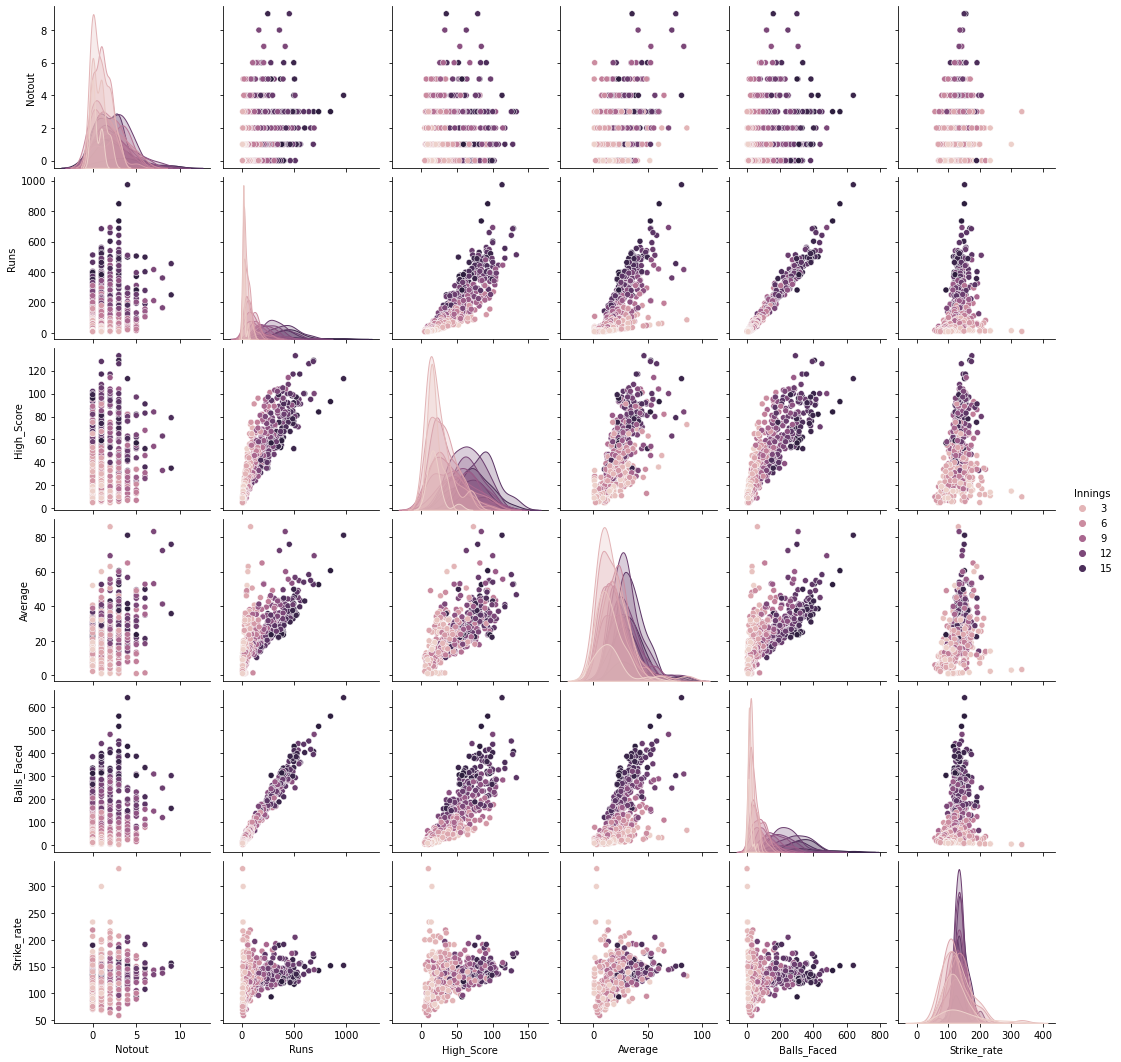

In [10]:
sns.pairplot(df,hue='Innings',diag_kind='kde',kind='scatter')

1. Here run is correlated with high_score , average, balls_faced in positive direction
        "There is a linear regression between run and ball_faced"
2. high_score is correlated with runs, average , balls_faced
       "But here there no linear regression in the plot"
3. here all the innings are a right skewed curve except strike_rate
       "strike rate seems to be a normal curve"

# Runs

<AxesSubplot:>

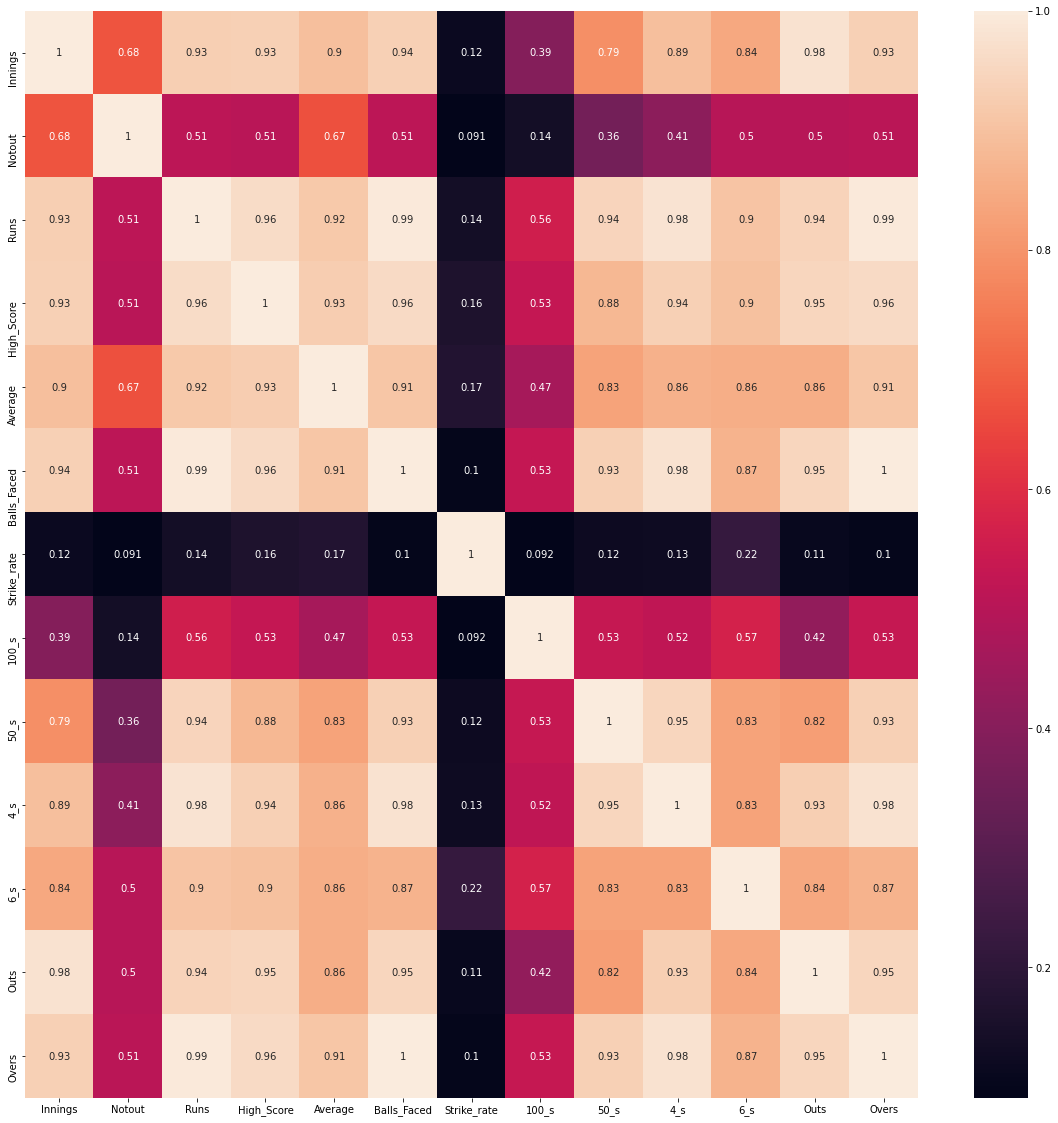

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(IPL_df.corr(),annot=True)

1. Here we can observe that Runs are correlated to High score,Innings,overs,balls faced,50_s,100_s,6_s,4_s etc 
2. Average depends up on Innings,Runs, High score,balls_faced , overs
3. Overs depends on innings,outs
4. Balls_faced is highly correlated to Runs

"It is clear that total IPL statistics depends on Runs because it mostly correlated to every column"


## Bi variate analysis

# High_Score

<AxesSubplot:xlabel='Years', ylabel='High_Score'>

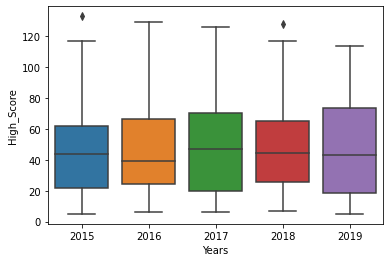

In [12]:
sns.boxplot(x="Years",y="High_Score",data=IPL)

Here we can see that High_score in every year are mostly similar ,
         50 percent of high_score are in between 40 to 50, 
                
           "Therefore the average scores of the 50% players in IPL are in between 40 to 50"

# Average

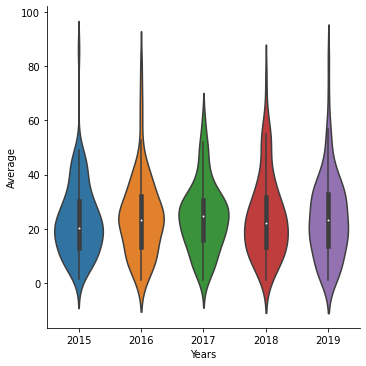

In [13]:
sns.catplot(x="Years",y="Average",data=IPL,kind="violin")

here 2017 has least average compared to other years

<AxesSubplot:xlabel='Average', ylabel='Density'>

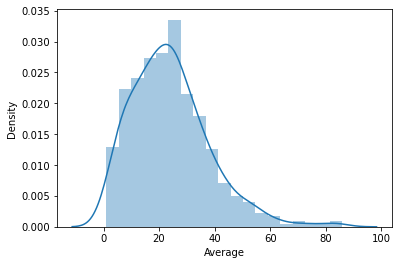

In [14]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(IPL['Average'])

Average is right skewed data

In [15]:
IPL.groupby(['Years']).agg({'Average':['mean','std']})

Average           
          mean        std
Years                    
2015   23.0575  13.324799
2016   24.4152  14.769415
2017   24.2689  12.641905
2018   24.4279  15.178770
2019   24.0926  15.215648

Here it is clear that 2017 is more consistent year than other years

# Balls faced

In [16]:
IPL_df.sort_values('Balls_Faced',ascending=False)

,Innings,Notout,Runs,High_Score,Average,Balls_Faced,Strike_rate,100_s,50_s,4_s,6_s,Outs,Overs
Players,,,,,,,,,,,,,
ViratKohli,70,12,2780,451,239.10,1987,139.91,5,20,239,103,58,329
DavidWarner,57,9,2743,410,231.27,1852,148.11,2,28,273,99,48,307
ShikharDhawan,77,10,2351,402,175.48,1838,127.91,0,19,272,48,67,304
AjinkyaRahane,70,8,2165,395,179.39,1713,126.39,1,14,226,45,62,283
SureshRaina,78,10,2043,355,154.62,1573,129.88,0,15,203,60,68,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ShardulThakur,4,2,29,27,10.00,12,241.67,0,0,4,1,2,1
RahulChahar,4,2,12,10,6.00,11,109.09,0,0,2,0,2,1
RileeRossouw,2,0,14,14,7.00,10,140.00,0,0,1,1,2,1


 Here if balls faced increases then overs , runs , average , high score all these also get increased

<AxesSubplot:xlabel='Balls_Faced', ylabel='Runs'>

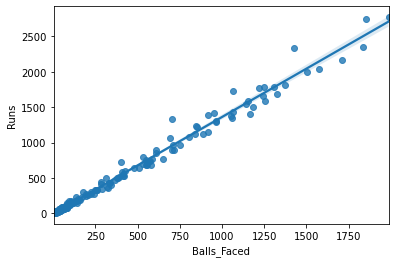

In [17]:
sns.regplot(x='Balls_Faced',y='Runs',data=IPL_df)

Here it is clear that ball_faced increases Runs also increases
so it is positively correlated to each other

# Uni variate analysis

# Strike rate

In [18]:
IPL_df.sort_values('Strike_rate',ascending=False)

,Innings,Notout,Runs,High_Score,Average,Balls_Faced,Strike_rate,100_s,50_s,4_s,6_s,Outs,Overs
Players,,,,,,,,,,,,,
IshantSharma,3,3,10,10,3.33,3,333.33,0,0,1,1,0,0
ShardulThakur,4,2,29,27,10.00,12,241.67,0,0,4,1,2,1
JohanBotha,3,0,31,17,10.33,15,206.67,0,0,5,1,3,2
AbuNechim,3,2,10,5,10.00,5,200.00,0,0,2,0,1,0
AbhishekSharma,3,2,63,46,63.00,33,190.91,0,0,3,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
KeemoPaul,6,1,18,7,3.60,24,75.00,0,0,1,1,5,4
NikhilNaik,2,0,23,22,11.50,31,74.19,0,0,1,0,2,5
VishnuVinod,3,0,19,9,6.33,26,73.08,0,0,1,1,3,4


Here in the first column we can notice that ishantsharma got only 3 innings but his strike rate is in the top 

 So Here it is very clear that strike_rate does not depend up on any columns 
"It only depends on the capability of the players"

<AxesSubplot:ylabel='Frequency'>

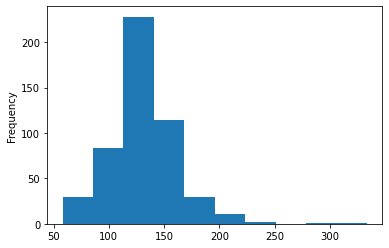

In [19]:
IPL['Strike_rate'].plot(kind='hist')

Most of the players are in between the Strike_rate of 100 to 160

# 100_s

In [20]:
df=IPL_df[IPL_df['100_s']>0]
df

,Innings,Notout,Runs,High_Score,Average,Balls_Faced,Strike_rate,100_s,50_s,4_s,6_s,Outs,Overs
Players,,,,,,,,,,,,,
ABdeVilliers,63,12,2338,523,224.00,1425,164.07,2,20,199,131,51,234
AjinkyaRahane,70,8,2165,395,179.39,1713,126.39,1,14,226,45,62,283
AmbatiRayudu,64,13,1590,338,146.28,1254,126.79,1,8,126,72,51,208
BenStokes,33,5,635,194,68.43,481,132.02,1,1,43,25,28,78
BrendonMcCullum,47,1,1236,275,105.81,847,145.93,1,5,134,63,46,139
ChrisGayle,57,5,1776,473,167.54,1217,145.93,2,12,146,134,52,202
DavidWarner,57,9,2743,410,231.27,1852,148.11,2,28,273,99,48,307
HashimAmla,16,3,577,200,86.16,407,141.77,2,3,60,21,13,67
JonnyBairstow,10,2,445,114,55.62,283,157.24,1,2,48,18,8,47


<AxesSubplot:xlabel='100_s', ylabel='count'>

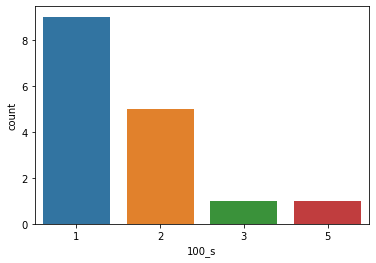

In [21]:
sns.countplot(x='100_s',data=df)

It is clear that most of the players got 1 century in IPL

# 50_s

In [22]:
df=IPL_df[IPL_df['50_s']>0]
df.sort_values('50_s')

,Innings,Notout,Runs,High_Score,Average,Balls_Faced,Strike_rate,100_s,50_s,4_s,6_s,Outs,Overs
Players,,,,,,,,,,,,,
MartinGuptill,13,1,270,134,68.00,196,137.76,0,1,24,15,12,31
MarcusStoinis,25,10,473,136,119.66,364,129.95,0,1,34,18,15,60
ShakibAlHasan,24,4,398,133,65.52,340,117.06,0,1,38,10,20,54
DeepakHooda,45,9,524,159,85.46,412,127.18,0,1,27,24,36,66
HarbhajanSingh,27,12,254,135,65.03,209,121.53,0,1,23,13,15,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
KLRahul,48,11,1791,307,181.32,1251,143.17,1,16,160,78,37,208
ShikharDhawan,77,10,2351,402,175.48,1838,127.91,0,19,272,48,67,304
ViratKohli,70,12,2780,451,239.10,1987,139.91,5,20,239,103,58,329


In [23]:
df1=df.loc[:,'50_s':'6_s']

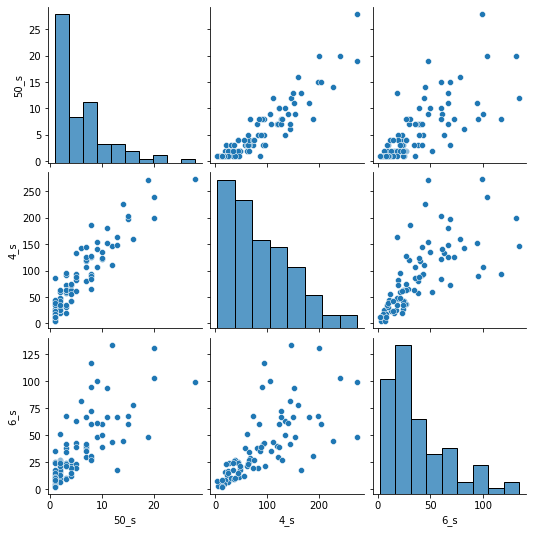

In [24]:
sns.pairplot(df1)

Here it is clear that ' the most 4_s and 6_s gives more half centuries to the players'

# 4_s & 6_s

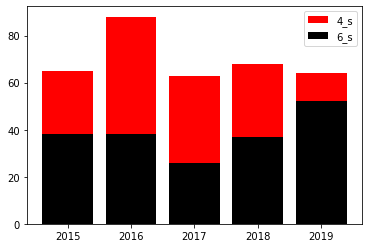

In [25]:
plt.bar(IPL['Years'],IPL['4_s'],color='red')
plt.bar(IPL['Years'],IPL['6_s'],color='black')
location = ['4_s', '6_s']
plt.legend(location, loc = 0)

Here we can observe that 
In 2015 6_s are more than 4_s

In 2016 6_s are less than 4_s

In 2017 6_s are less than 4_s

In 2018 6_s are more than 4_s

In 2019 6_s are more than 4_s

# Players scorings details

In [26]:
Players=IPL[IPL['Players']=='MSDhoni']
Players

,Players,Innings,Notout,Runs,High_Score,Average,Balls_Faced,Strike_rate,100_s,50_s,4_s,6_s,Years,Outs,Overs
14,MSDhoni,17,5,372,53,31.00,305,121.96,0,1,27,17,2015,12,50
120,MSDhoni,12,5,284,64,40.57,210,135.23,0,1,18,14,2016,7,35
225,MSDhoni,15,4,290,61,26.36,250,116.00,0,1,15,16,2017,11,41
312,MSDhoni,15,9,455,79,75.83,302,150.66,0,3,24,30,2018,6,50
412,MSDhoni,12,7,416,84,83.20,309,134.62,0,3,22,23,2019,5,51


<AxesSubplot:xlabel='Years', ylabel='Average'>

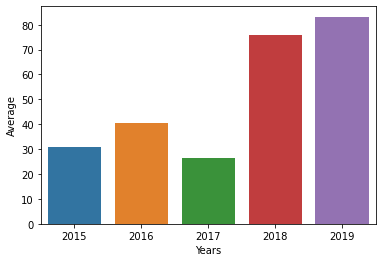

In [27]:
sns.barplot(x='Years',y='Average',data=Players)

In [28]:
Players['Average'].std()

26.30834031253207

The Player who gets less stadard deviation that player is a consistent player

If we get uniform bar for all the year the the player is the consistent player

By changing the Players_name we can see the players who we need to see
Similarly in the graph also we can change the y axis as what you need to see

In [29]:
pd.crosstab(IPL['Years'],IPL['Innings'])

Innings,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Years,,,,,,,,,,,,,,,,,
2015,0,8,13,6,6,5,4,8,7,3,7,7,10,10,1,3,2
2016,1,7,12,7,6,15,7,3,2,6,3,8,5,5,8,3,2
2017,4,6,14,4,3,6,12,2,7,7,8,3,9,7,2,6,0
2018,2,4,6,16,5,9,5,8,3,3,5,4,10,8,5,6,1
2019,6,4,7,13,9,5,6,4,5,5,3,8,8,5,4,5,3


Here we can see no.of players are paticipated  in no.of innings 

we took top 100 players in every year we can cross check the above crosstab by counting all innings in all year

# Conclusion

By seeing this data we can say that the players runs depends on their ball_faced, 
similarly the ball_faced depends on the Innings , outs , not out

Players high_score and average depends on their ball_faced

If the players face more balls his average scores gets increased,
More 4's and 6's the player hits gives more century and half century to him

The consistency of the player can be defined by their "Average"
If the Average of the player in all year be uniform the the Player is more Consistent

